# Estimation of tree height using GEDI dataset - Perceptron 2

Python packages intallation

    pip3 install torch torchvision torchaudio
    
Ref: https://medium.com/biaslyai/pytorch-introduction-to-neural-network-feedforward-neural-network-model-e7231cff47cb

In [2]:
import os
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy import stats

Fix random seeds

In [3]:
seed=31
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

We already have seen how to design a simple Perceptron to perform a regression. Also, we observed that the normalization of the data and target should match the structure of our model. However, just guaranteeing the data is in the correct range is not enough. Let's see how it works.

In [2]:
# #What are we trying to beat
# data = pd.read_csv('./tree_height/txt/eu_x_y_height_predictors.txt',  sep=" ")
# # data = pd.read_csv('./tree_height/txt/eu_x_y_height.txt',  sep=" ")
# print(data.shape)
# print(data.head())

# y_true = data['h']
# y_pred = data['forest_height']

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_pred, y_true)

# fig,ax=plt.subplots(1,1,figsize=(5,5))
# ax.scatter(y_pred, y_true)
# ax.set_xlabel('Prediction')
# ax.set_ylabel('True')
# ax.set_title('slope: {:.4f}, r_value: {:.4f}'.format(slope, r_value))
# plt.show()

Let's start by loading the data we used in the previous class

In [3]:
### Try the the tree height with Perceptron 
# data = pd.read_csv('./tree_height/txt/eu_x_y_height_predictors.txt',  sep=" ")
data = pd.read_csv('./tree_height/txt/eu_x_y_height.txt',  sep=" ")
print(data.shape)
print(data.head())

(66522, 3)
          x          y      h
0  6.894317  49.482459   2.73
1  7.023274  49.510552  10.75
2  7.394650  49.590488  21.20
3  7.396895  49.590968  20.00
4  7.397643  49.591128  24.23


Once again, let's take a look at the distributions and range of our data

(array([5.287e+03, 2.447e+03, 1.626e+03, 1.406e+03, 1.308e+03, 1.327e+03,
        1.483e+03, 1.721e+03, 1.957e+03, 2.022e+03, 2.131e+03, 2.314e+03,
        2.726e+03, 3.055e+03, 3.551e+03, 3.900e+03, 3.956e+03, 4.169e+03,
        4.049e+03, 3.536e+03, 3.120e+03, 2.561e+03, 1.923e+03, 1.473e+03,
        1.069e+03, 7.340e+02, 5.460e+02, 3.720e+02, 2.410e+02, 1.860e+02,
        1.010e+02, 7.200e+01, 7.300e+01, 4.300e+01, 1.500e+01, 6.000e+00,
        6.000e+00, 6.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.72  ,  3.1364,  4.5528,  5.9692,  7.3856,  8.802 , 10.2184,
        11.6348, 13.0512, 14.4676, 15.884 , 17.3004, 18.7168, 20.1332,
        21.5496, 22.966 , 24.3824, 25.7988, 27.2152, 28.6316, 30.048 ,
        31.4644, 32.8808, 34.2972, 35.7136, 37.13  , 38.5464, 39.9628,
        41.3792, 42.7956, 44.212 , 45.6284, 47.0448, 48.4612, 49.8776,
        51.294 , 52.7

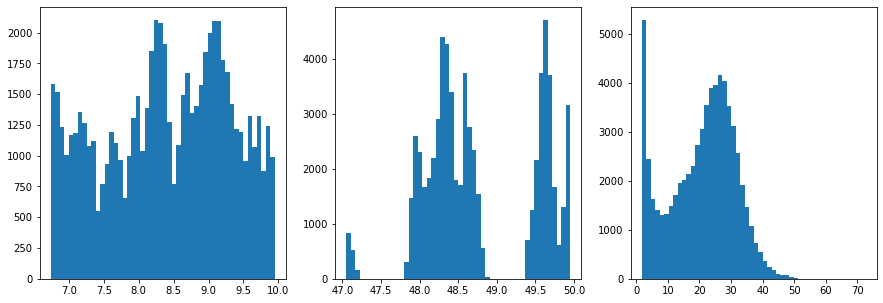

In [4]:
#Explore the raw data
data = data.to_numpy()
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].hist(data[:,0],50)
ax[1].hist(data[:,1],50)
ax[2].hist(data[:,2],50)

Now we normalize the data

(array([5.287e+03, 2.447e+03, 1.626e+03, 1.406e+03, 1.308e+03, 1.327e+03,
        1.483e+03, 1.721e+03, 1.957e+03, 2.022e+03, 2.131e+03, 2.314e+03,
        2.726e+03, 3.055e+03, 3.551e+03, 3.900e+03, 3.956e+03, 4.169e+03,
        4.049e+03, 3.536e+03, 3.120e+03, 2.561e+03, 1.923e+03, 1.473e+03,
        1.069e+03, 7.340e+02, 5.460e+02, 3.720e+02, 2.410e+02, 1.860e+02,
        1.010e+02, 7.200e+01, 7.300e+01, 4.300e+01, 1.500e+01, 6.000e+00,
        6.000e+00, 6.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 

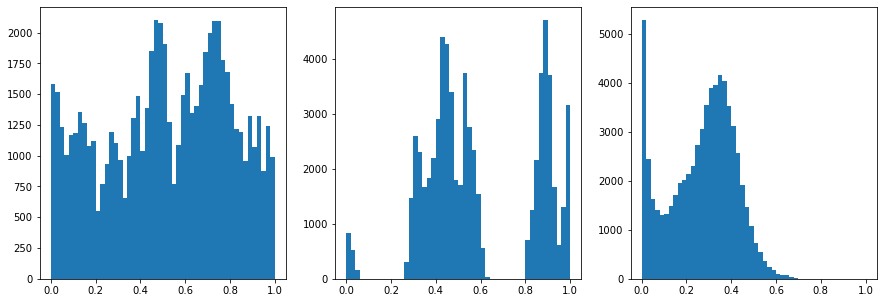

In [5]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].hist(data[:,0],50)
ax[1].hist(data[:,1],50)
ax[2].hist(data[:,2],50)

In [6]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(data[:,:2], data[:,2], test_size=0.30, random_state=0)
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)
print('X_train.shape: {}, X_test.shape: {}, y_train.shape: {}, y_test.shape: {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train.shape: torch.Size([46565, 2]), X_test.shape: torch.Size([19957, 2]), y_train.shape: torch.Size([46565]), y_test.shape: torch.Size([19957])


Finally, let's create and initialize our Perceptron

In [33]:
# Create the model
class Perceptron(torch.nn.Module):
    def __init__(self,input_size, output_size,use_activation_fn=None):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size,output_size)
        self.relu = torch.nn.ReLU() # instead of Heaviside step fn
        self.sigmoid = torch.nn.Sigmoid()
        self.tanh = torch.nn.Tanh()
        self.use_activation_fn=use_activation_fn
    def forward(self, x):
        output = self.fc(x)
        if self.use_activation_fn=='sigmoid':
            output = self.sigmoid(output) # To add the non-linearity. Try training you Perceptron with and without the non-linearity
        elif self.use_activation_fn=='tanh':
            output = self.tanh(output) 
        elif self.use_activation_fn=='relu':
            output = self.relu(output) 

        return output

In [26]:
#Just in case, remember to always delete previously existent models before starting a new session
if 'model' in globals():
    print('Deleting previous model')
    del model, criterion, optimizer
model = Perceptron(input_size=2, output_size=1, use_activation_fn='tanh')
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

Deleting previous model


Let's train and check our model's performance

Test loss after Training 0.024563319981098175


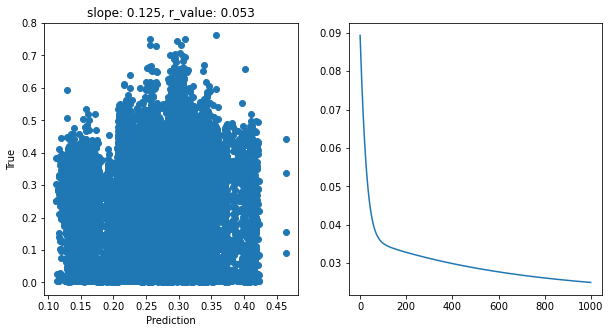

In [27]:
model.train()
epoch = 1000
all_loss=[]
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(X_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
   
    # Backward pass
    loss.backward()
    optimizer.step()
    
    all_loss.append(loss.item())
    
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    after_train = criterion(y_pred.squeeze(), y_test) 
    print('Test loss after Training' , after_train.item())

    y_pred = y_pred.detach().numpy().squeeze()
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_pred, y_test)

    # Fit line
    # x = np.arange(-150,150)

    fig,ax=plt.subplots(1,2,figsize=(10,5))
    ax[1].plot(all_loss)
    ax[0].scatter(y_pred, y_test)
    # ax[0].plot(x, intercept + slope*x, 'r', label='fitted line')
    ax[0].set_xlabel('Prediction')
    ax[0].set_ylabel('True')
    ax[0].set_title('slope: {:.3f}, r_value: {:.3f}'.format(slope, r_value))

Well, they all performed badly. What can we do to make this model better? One thing that immediatly jumps to our eyes is the fact that this data is very skewed. There are many ways to normalized sweked data. Check out this great post about normalization and popular power transformations [power transformations](https://www.baeldung.com/cs/normalizing-inputs-artificial-neural-network). Here I will introduce another one: the Quantile Transformation. Also, if you would like to see a great comparison between transformations, check out this skelarn [post](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) 

For now, let's use the power transformation just for our target variable (ie, tree height).

In [28]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(
    n_quantiles=500, output_distribution="normal", random_state=0
)

# X_train, X_test = train_test_split(data, test_size=0.5)
# data = qt.fit_transform(data)
data[:,2] = qt.fit_transform(data[:,2].reshape(-1,1)).squeeze()

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 6.500e+01, 1.240e+02,
        2.050e+02, 3.430e+02, 3.760e+02, 8.450e+02, 1.115e+03, 1.770e+03,
        2.175e+03, 2.876e+03, 3.571e+03, 4.227e+03, 4.866e+03, 5.195e+03,
        5.512e+03, 5.437e+03, 5.233e+03, 4.862e+03, 4.215e+03, 3.589e+03,
        2.862e+03, 2.204e+03, 1.663e+03, 1.150e+03, 8.020e+02, 5.080e+02,
        3.100e+02, 1.950e+02, 1.890e+02, 3.400e+01, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,

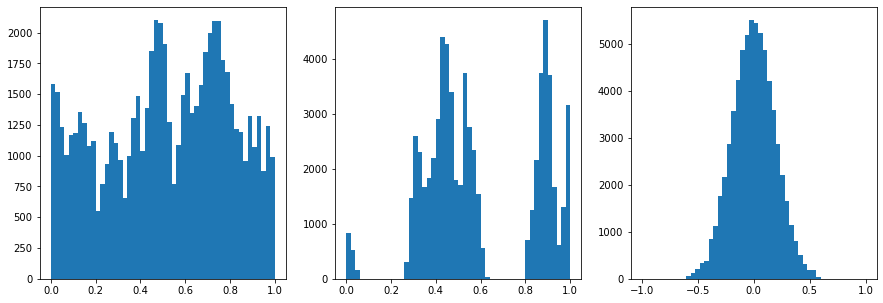

In [29]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data[:,2] = ((data[:,2]-data[:,2].min())/(data[:,2].max()-data[:,2].min()))*2-1
# data[:,2] = data[:,2]/np.quantile(np.abs(data[:,2]),0.99)
data[:,2] = data[:,2]/data[:,2].max()
# data = data/np.quantile(np.abs(data),0.99)
# data = data/data.max()
# print(data.shape)
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].hist(data[:,0],50)
ax[1].hist(data[:,1],50)
ax[2].hist(data[:,2],50)

In [30]:
# Let's use all the data as one big minibatch

#Split the data
X_train, X_test, y_train, y_test = train_test_split(data[:,:2], data[:,2], test_size=0.30, random_state=0)
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)
print('X_train.shape: {}, X_test.shape: {}, y_train.shape: {}, y_test.shape: {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
print('X_train.min: {}, X_test.shape: {}, y_train.shape: {}, y_test.shape: {}'.format(X_train.min(), X_test.min(), y_train.min(), y_test.min()))
print('X_train.max: {}, X_test.shape: {}, y_train.shape: {}, y_test.shape: {}'.format(X_train.max(), X_test.max(), y_train.max(), y_test.max()))

X_train.shape: torch.Size([46565, 2]), X_test.shape: torch.Size([19957, 2]), y_train.shape: torch.Size([46565]), y_test.shape: torch.Size([19957])
X_train.min: 0.0, X_test.shape: 0.0, y_train.shape: -0.6420077085494995, y_test.shape: -1.0
X_train.max: 1.0, X_test.shape: 1.0, y_train.shape: 1.0, y_test.shape: 0.57742840051651



hid_dim: 1, lr: 0.5
Deleting previous model
Epoch 0, train_loss: 0.4734, val_loss: 0.0876, r_value: 0.0641
Epoch 100, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 200, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 300, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 400, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 500, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 600, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 700, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 800, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 900, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 1000, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 1100, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 1200, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 1300, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 1400, train_loss: 0.0368, val_loss: 0

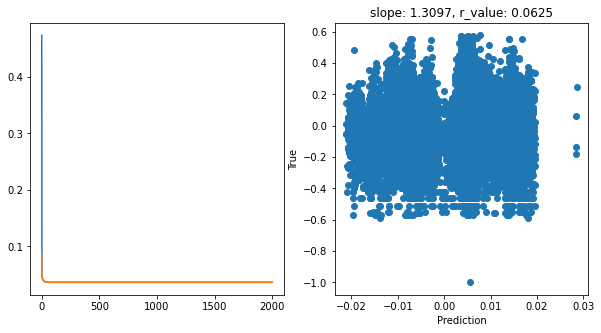


hid_dim: 1, lr: 0.1
Deleting previous model
Epoch 0, train_loss: 0.1593, val_loss: 0.1113, r_value: -0.0523
Epoch 100, train_loss: 0.0393, val_loss: 0.0391, r_value: -0.0608
Epoch 200, train_loss: 0.0373, val_loss: 0.0370, r_value: -0.0599
Epoch 300, train_loss: 0.0369, val_loss: 0.0365, r_value: 0.0191
Epoch 400, train_loss: 0.0369, val_loss: 0.0364, r_value: 0.0628
Epoch 500, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0627
Epoch 600, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0626
Epoch 700, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0626
Epoch 800, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 900, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 1000, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 1100, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 1200, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 1300, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0625
Epoch 1400, train_loss: 0.0368, val_loss

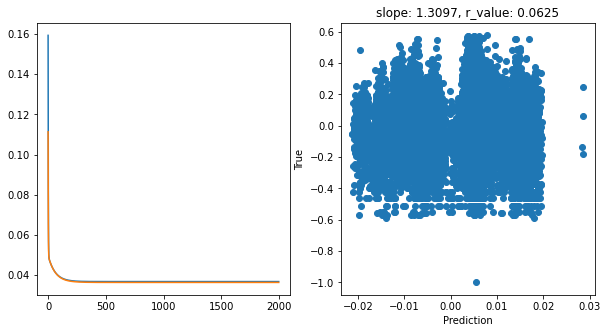


hid_dim: 1, lr: 0.01
Deleting previous model
Epoch 0, train_loss: 0.4136, val_loss: 0.4030, r_value: -0.0181
Epoch 100, train_loss: 0.0422, val_loss: 0.0417, r_value: -0.0280
Epoch 200, train_loss: 0.0398, val_loss: 0.0394, r_value: -0.0288
Epoch 300, train_loss: 0.0392, val_loss: 0.0389, r_value: -0.0289
Epoch 400, train_loss: 0.0388, val_loss: 0.0385, r_value: -0.0289
Epoch 500, train_loss: 0.0384, val_loss: 0.0381, r_value: -0.0289
Epoch 600, train_loss: 0.0382, val_loss: 0.0378, r_value: -0.0287
Epoch 700, train_loss: 0.0379, val_loss: 0.0376, r_value: -0.0283
Epoch 800, train_loss: 0.0377, val_loss: 0.0374, r_value: -0.0278
Epoch 900, train_loss: 0.0376, val_loss: 0.0372, r_value: -0.0271
Epoch 1000, train_loss: 0.0374, val_loss: 0.0371, r_value: -0.0261
Epoch 1100, train_loss: 0.0373, val_loss: 0.0370, r_value: -0.0247
Epoch 1200, train_loss: 0.0372, val_loss: 0.0369, r_value: -0.0230
Epoch 1300, train_loss: 0.0372, val_loss: 0.0368, r_value: -0.0208
Epoch 1400, train_loss: 0.03

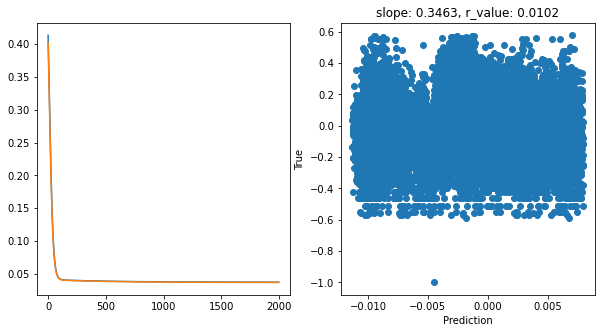

In [38]:
# model.train()
epoch = 2000
hid_dim_range = [1]
lr_range = [0.5,0.1,0.01]#,0.05,0.001]

for hid_dim in hid_dim_range:
    for lr in lr_range:
        print('\nhid_dim: {}, lr: {}'.format(hid_dim, lr))
        if 'model' in globals():
            print('Deleting previous model')
            del model, criterion, optimizer
        model = Perceptron(2, hid_dim,use_activation_fn='tanh')
        criterion = torch.nn.MSELoss()
        optimizer = torch.optim.SGD(model.parameters(), lr = lr)

        all_loss_train=[]
        all_loss_val=[]
        for epoch in range(epoch):
            model.train()
            optimizer.zero_grad()
            # Forward pass
            y_pred = model(X_train)
            # Compute Loss
            loss = criterion(y_pred.squeeze(), y_train)

            # Backward pass
            loss.backward()
            optimizer.step()

            all_loss_train.append(loss.item())

            model.eval()
            with torch.no_grad():
                y_pred = model(X_test)
                # Compute Loss
                loss = criterion(y_pred.squeeze(), y_test)
                all_loss_val.append(loss.item())
            
                if epoch%100==0:
                    y_pred = y_pred.detach().numpy().squeeze()
                    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_pred, y_test)
                    print('Epoch {}, train_loss: {:.4f}, val_loss: {:.4f}, r_value: {:.4f}'.format(epoch,all_loss_train[-1],all_loss_val[-1],r_value))
                
        fig,ax=plt.subplots(1,2,figsize=(10,5))
        ax[0].plot(all_loss_train)
        ax[0].plot(all_loss_val)

        ax[1].scatter(y_pred, y_test)
        ax[1].set_xlabel('Prediction')
        ax[1].set_ylabel('True')
        ax[1].set_title('slope: {:.4f}, r_value: {:.4f}'.format(slope, r_value))
        plt.show()

Feel free to try other hyperparameters, but we already have seen that there is just so much a Perceptron can do. It's time to scale up this problem. 
(BACK TO SLIDES)

## Feedfoward neural network

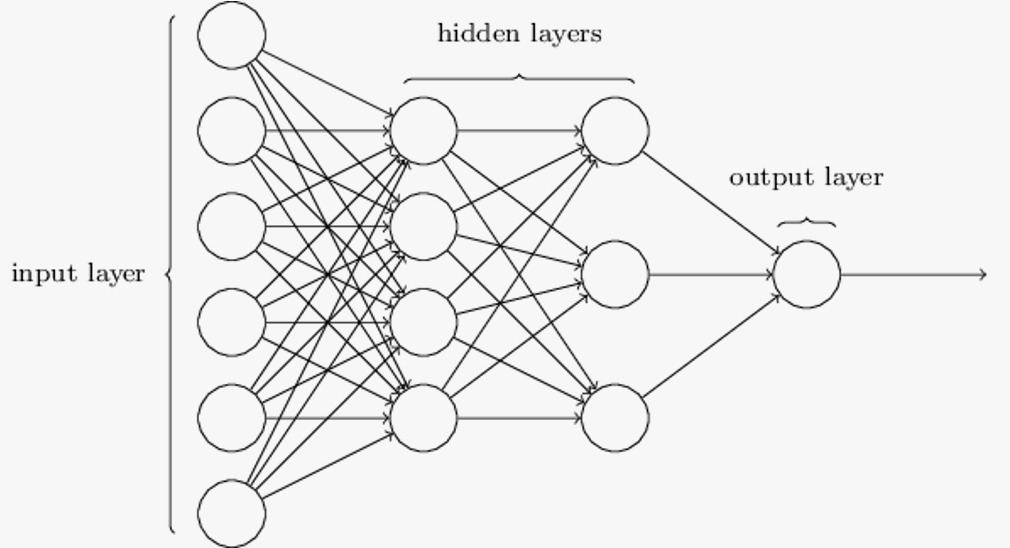

In [7]:
from IPython.display import Image
Image("../images/neural_network.jpeg" , width = 600, height = 400)

In [39]:
# Try with FF
class Feedforward(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1):
        super(Feedforward, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.fc2 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        # self.fc3 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        # self.fc4 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(self.hidden_size, output_size)
        self.sigmoid = torch.nn.Sigmoid()
        self.tanh = torch.nn.Tanh()
    def forward(self, x):
        hidden = self.relu(self.fc1(x))
        hidden = self.relu(self.fc2(hidden))
        # hidden = self.relu(self.fc3(hidden))
        # hidden = self.relu(self.fc4(hidden))
        output = self.tanh(self.fc3(hidden))

        return output


hid_dim: 128, lr: 0.75
Deleting previous model
Epoch 0, train_loss: 0.0378, val_loss: 0.0452, r_value: 0.0684
Epoch 100, train_loss: 0.0361, val_loss: 0.0356, r_value: 0.1693
Epoch 200, train_loss: 0.0363, val_loss: 0.0362, r_value: 0.2179
Epoch 300, train_loss: 0.0362, val_loss: 0.0361, r_value: 0.2423
Epoch 400, train_loss: 0.0360, val_loss: 0.0359, r_value: 0.2511
Epoch 500, train_loss: 0.0358, val_loss: 0.0356, r_value: 0.2581
Epoch 600, train_loss: 0.0356, val_loss: 0.0354, r_value: 0.2628
Epoch 700, train_loss: 0.0355, val_loss: 0.0352, r_value: 0.2658
Epoch 800, train_loss: 0.0354, val_loss: 0.0351, r_value: 0.2682
Epoch 900, train_loss: 0.0353, val_loss: 0.0350, r_value: 0.2699
Epoch 1000, train_loss: 0.0353, val_loss: 0.0349, r_value: 0.2713
Epoch 1100, train_loss: 0.0352, val_loss: 0.0349, r_value: 0.2724
Epoch 1200, train_loss: 0.0352, val_loss: 0.0349, r_value: 0.2733
Epoch 1300, train_loss: 0.0352, val_loss: 0.0348, r_value: 0.2741
Epoch 1400, train_loss: 0.0352, val_loss

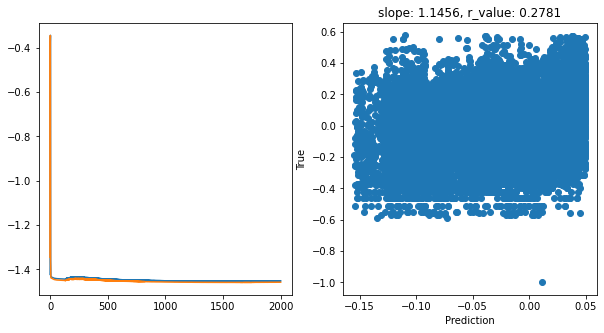

Saving model to  ./models/model_SGD_2000_lr0.75_hid_dim128

hid_dim: 128, lr: 0.5
Deleting previous model
Epoch 0, train_loss: 0.0376, val_loss: 0.0386, r_value: -0.0364
Epoch 100, train_loss: 0.0347, val_loss: 0.0344, r_value: 0.2551
Epoch 200, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2643
Epoch 300, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2684
Epoch 400, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2716
Epoch 500, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2738
Epoch 600, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2757
Epoch 700, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2770
Epoch 800, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2787
Epoch 900, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2796
Epoch 1000, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2811
Epoch 1100, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2823
Epoch 1200, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2835
Epoch 1300, train_loss: 0.0342, val_loss: 0.033

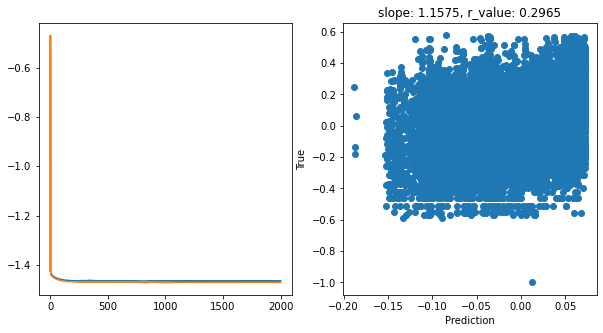

Saving model to  ./models/model_SGD_2000_lr0.5_hid_dim128

hid_dim: 128, lr: 0.1
Deleting previous model
Epoch 0, train_loss: 0.0382, val_loss: 0.0374, r_value: -0.0407
Epoch 100, train_loss: 0.0358, val_loss: 0.0354, r_value: 0.2308
Epoch 200, train_loss: 0.0354, val_loss: 0.0349, r_value: 0.2512
Epoch 300, train_loss: 0.0350, val_loss: 0.0346, r_value: 0.2560
Epoch 400, train_loss: 0.0348, val_loss: 0.0344, r_value: 0.2584
Epoch 500, train_loss: 0.0346, val_loss: 0.0343, r_value: 0.2600
Epoch 600, train_loss: 0.0345, val_loss: 0.0342, r_value: 0.2616
Epoch 700, train_loss: 0.0345, val_loss: 0.0341, r_value: 0.2632
Epoch 800, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2645
Epoch 900, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2658
Epoch 1000, train_loss: 0.0343, val_loss: 0.0340, r_value: 0.2670
Epoch 1100, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2682
Epoch 1200, train_loss: 0.0346, val_loss: 0.0342, r_value: 0.2695
Epoch 1300, train_loss: 0.0343, val_loss: 0.0339

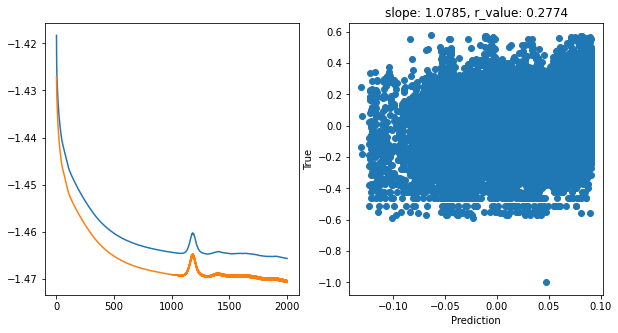

Saving model to  ./models/model_SGD_2000_lr0.1_hid_dim128

hid_dim: 128, lr: 0.01
Deleting previous model
Epoch 0, train_loss: 0.0551, val_loss: 0.0492, r_value: -0.0104
Epoch 100, train_loss: 0.0368, val_loss: 0.0365, r_value: 0.0628
Epoch 200, train_loss: 0.0363, val_loss: 0.0359, r_value: 0.1447
Epoch 300, train_loss: 0.0360, val_loss: 0.0356, r_value: 0.1963
Epoch 400, train_loss: 0.0358, val_loss: 0.0354, r_value: 0.2252
Epoch 500, train_loss: 0.0357, val_loss: 0.0353, r_value: 0.2407
Epoch 600, train_loss: 0.0356, val_loss: 0.0352, r_value: 0.2476
Epoch 700, train_loss: 0.0356, val_loss: 0.0351, r_value: 0.2516
Epoch 800, train_loss: 0.0355, val_loss: 0.0351, r_value: 0.2549
Epoch 900, train_loss: 0.0354, val_loss: 0.0350, r_value: 0.2579
Epoch 1000, train_loss: 0.0354, val_loss: 0.0350, r_value: 0.2599
Epoch 1100, train_loss: 0.0353, val_loss: 0.0349, r_value: 0.2614
Epoch 1200, train_loss: 0.0353, val_loss: 0.0349, r_value: 0.2625
Epoch 1300, train_loss: 0.0352, val_loss: 0.034

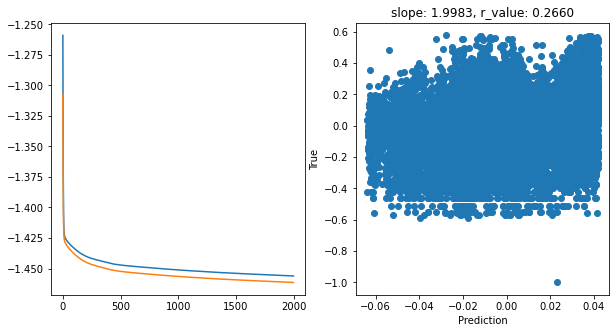

Saving model to  ./models/model_SGD_2000_lr0.01_hid_dim128

hid_dim: 128, lr: 0.05
Deleting previous model
Epoch 0, train_loss: 0.0383, val_loss: 0.0365, r_value: 0.1254
Epoch 100, train_loss: 0.0358, val_loss: 0.0354, r_value: 0.2240
Epoch 200, train_loss: 0.0355, val_loss: 0.0350, r_value: 0.2413
Epoch 300, train_loss: 0.0353, val_loss: 0.0348, r_value: 0.2488
Epoch 400, train_loss: 0.0351, val_loss: 0.0347, r_value: 0.2528
Epoch 500, train_loss: 0.0349, val_loss: 0.0345, r_value: 0.2555
Epoch 600, train_loss: 0.0348, val_loss: 0.0344, r_value: 0.2576
Epoch 700, train_loss: 0.0347, val_loss: 0.0343, r_value: 0.2595
Epoch 800, train_loss: 0.0346, val_loss: 0.0342, r_value: 0.2606
Epoch 900, train_loss: 0.0346, val_loss: 0.0342, r_value: 0.2615
Epoch 1000, train_loss: 0.0345, val_loss: 0.0341, r_value: 0.2623
Epoch 1100, train_loss: 0.0345, val_loss: 0.0341, r_value: 0.2630
Epoch 1200, train_loss: 0.0345, val_loss: 0.0341, r_value: 0.2636
Epoch 1300, train_loss: 0.0344, val_loss: 0.034

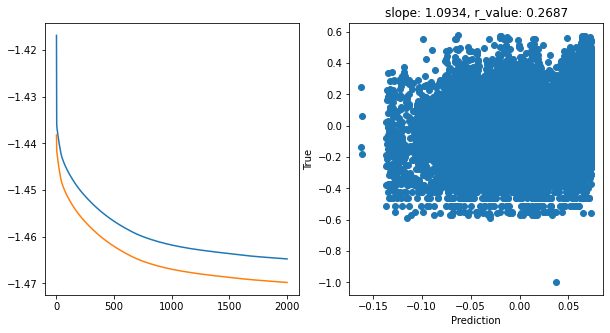

Saving model to  ./models/model_SGD_2000_lr0.05_hid_dim128

hid_dim: 128, lr: 0.001
Deleting previous model
Epoch 0, train_loss: 0.0574, val_loss: 0.0561, r_value: 0.0304
Epoch 100, train_loss: 0.0378, val_loss: 0.0372, r_value: 0.0590
Epoch 200, train_loss: 0.0369, val_loss: 0.0364, r_value: 0.0693
Epoch 300, train_loss: 0.0368, val_loss: 0.0363, r_value: 0.0761
Epoch 400, train_loss: 0.0368, val_loss: 0.0363, r_value: 0.0823
Epoch 500, train_loss: 0.0367, val_loss: 0.0363, r_value: 0.0880
Epoch 600, train_loss: 0.0367, val_loss: 0.0362, r_value: 0.0933
Epoch 700, train_loss: 0.0367, val_loss: 0.0362, r_value: 0.0982
Epoch 800, train_loss: 0.0366, val_loss: 0.0362, r_value: 0.1029
Epoch 900, train_loss: 0.0366, val_loss: 0.0361, r_value: 0.1074
Epoch 1000, train_loss: 0.0366, val_loss: 0.0361, r_value: 0.1115
Epoch 1100, train_loss: 0.0366, val_loss: 0.0361, r_value: 0.1154
Epoch 1200, train_loss: 0.0365, val_loss: 0.0361, r_value: 0.1191
Epoch 1300, train_loss: 0.0365, val_loss: 0.03

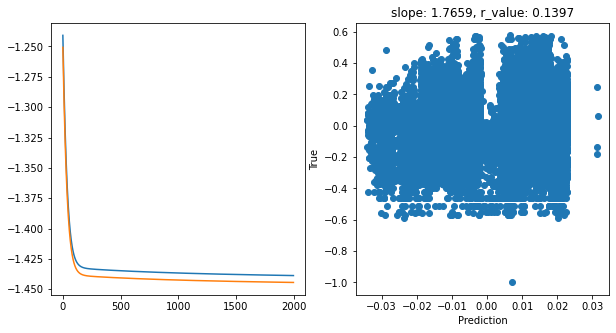

Saving model to  ./models/model_SGD_2000_lr0.001_hid_dim128

hid_dim: 256, lr: 0.75
Deleting previous model
Epoch 0, train_loss: 0.0370, val_loss: 0.0699, r_value: 0.0443
Epoch 100, train_loss: 0.0364, val_loss: 0.0364, r_value: 0.2351
Epoch 200, train_loss: 0.0365, val_loss: 0.0365, r_value: 0.2423
Epoch 300, train_loss: 0.0363, val_loss: 0.0363, r_value: 0.2487
Epoch 400, train_loss: 0.0362, val_loss: 0.0362, r_value: 0.2525
Epoch 500, train_loss: 0.0362, val_loss: 0.0361, r_value: 0.2552
Epoch 600, train_loss: 0.0361, val_loss: 0.0360, r_value: 0.2571
Epoch 700, train_loss: 0.0361, val_loss: 0.0360, r_value: 0.2587
Epoch 800, train_loss: 0.0361, val_loss: 0.0359, r_value: 0.2599
Epoch 900, train_loss: 0.0361, val_loss: 0.0359, r_value: 0.2609
Epoch 1000, train_loss: 0.0361, val_loss: 0.0359, r_value: 0.2618
Epoch 1100, train_loss: 0.0361, val_loss: 0.0359, r_value: 0.2626
Epoch 1200, train_loss: 0.0361, val_loss: 0.0359, r_value: 0.2633
Epoch 1300, train_loss: 0.0361, val_loss: 0.03

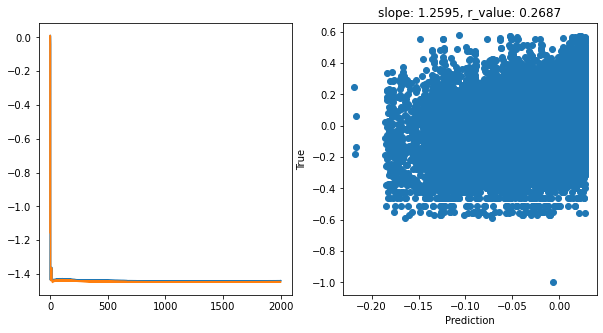

Saving model to  ./models/model_SGD_2000_lr0.75_hid_dim256

hid_dim: 256, lr: 0.5
Deleting previous model
Epoch 0, train_loss: 0.0402, val_loss: 0.2662, r_value: 0.0069
Epoch 100, train_loss: 0.0358, val_loss: 0.0352, r_value: 0.2610
Epoch 200, train_loss: 0.0351, val_loss: 0.0346, r_value: 0.2666
Epoch 300, train_loss: 0.0348, val_loss: 0.0343, r_value: 0.2728
Epoch 400, train_loss: 0.0347, val_loss: 0.0342, r_value: 0.2764
Epoch 500, train_loss: 0.0346, val_loss: 0.0341, r_value: 0.2797
Epoch 600, train_loss: 0.0346, val_loss: 0.0341, r_value: 0.2828
Epoch 700, train_loss: 0.0346, val_loss: 0.0341, r_value: 0.2857
Epoch 800, train_loss: 0.0346, val_loss: 0.0341, r_value: 0.2882
Epoch 900, train_loss: 0.0346, val_loss: 0.0341, r_value: 0.2904
Epoch 1000, train_loss: 0.0346, val_loss: 0.0341, r_value: 0.2923
Epoch 1100, train_loss: 0.0346, val_loss: 0.0341, r_value: 0.2940
Epoch 1200, train_loss: 0.0346, val_loss: 0.0341, r_value: 0.2955
Epoch 1300, train_loss: 0.0346, val_loss: 0.0341

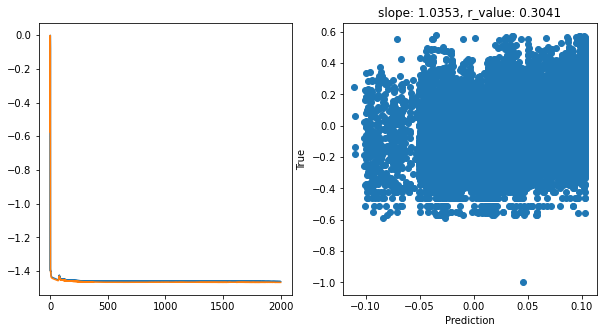

Saving model to  ./models/model_SGD_2000_lr0.5_hid_dim256

hid_dim: 256, lr: 0.1
Deleting previous model
Epoch 0, train_loss: 0.0415, val_loss: 0.0423, r_value: -0.0507
Epoch 100, train_loss: 0.0352, val_loss: 0.0348, r_value: 0.2581
Epoch 200, train_loss: 0.0348, val_loss: 0.0344, r_value: 0.2617
Epoch 300, train_loss: 0.0346, val_loss: 0.0341, r_value: 0.2638
Epoch 400, train_loss: 0.0350, val_loss: 0.0346, r_value: 0.2652
Epoch 500, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2679
Epoch 600, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2698
Epoch 700, train_loss: 0.0343, val_loss: 0.0340, r_value: 0.2717
Epoch 800, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2733
Epoch 900, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2749
Epoch 1000, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2763
Epoch 1100, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2777
Epoch 1200, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2791
Epoch 1300, train_loss: 0.0341, val_loss: 0.0338

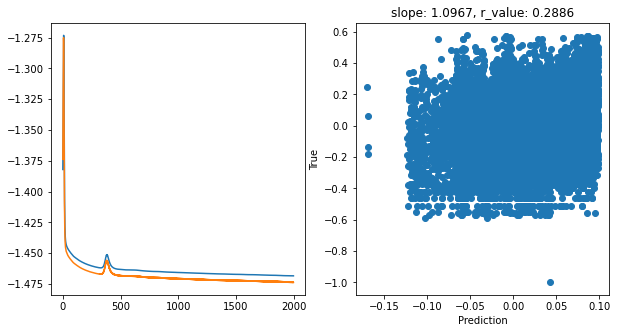

Saving model to  ./models/model_SGD_2000_lr0.1_hid_dim256

hid_dim: 256, lr: 0.01
Deleting previous model
Epoch 0, train_loss: 0.0488, val_loss: 0.0437, r_value: -0.0226
Epoch 100, train_loss: 0.0364, val_loss: 0.0361, r_value: 0.1871
Epoch 200, train_loss: 0.0361, val_loss: 0.0357, r_value: 0.2343
Epoch 300, train_loss: 0.0358, val_loss: 0.0354, r_value: 0.2364
Epoch 400, train_loss: 0.0357, val_loss: 0.0353, r_value: 0.2359
Epoch 500, train_loss: 0.0356, val_loss: 0.0352, r_value: 0.2366
Epoch 600, train_loss: 0.0355, val_loss: 0.0351, r_value: 0.2384
Epoch 700, train_loss: 0.0354, val_loss: 0.0350, r_value: 0.2408
Epoch 800, train_loss: 0.0353, val_loss: 0.0349, r_value: 0.2434
Epoch 900, train_loss: 0.0352, val_loss: 0.0348, r_value: 0.2461
Epoch 1000, train_loss: 0.0352, val_loss: 0.0347, r_value: 0.2481
Epoch 1100, train_loss: 0.0351, val_loss: 0.0347, r_value: 0.2497
Epoch 1200, train_loss: 0.0351, val_loss: 0.0346, r_value: 0.2508
Epoch 1300, train_loss: 0.0350, val_loss: 0.034

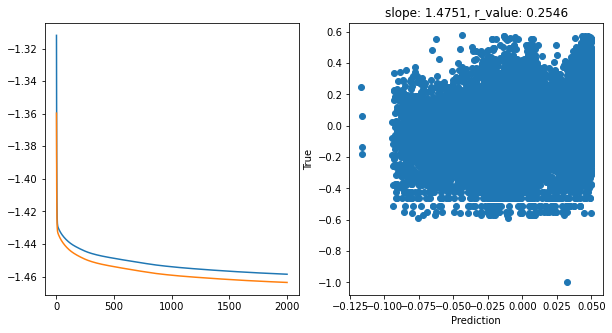

Saving model to  ./models/model_SGD_2000_lr0.01_hid_dim256

hid_dim: 256, lr: 0.05
Deleting previous model
Epoch 0, train_loss: 0.0471, val_loss: 0.0369, r_value: 0.0630
Epoch 100, train_loss: 0.0355, val_loss: 0.0351, r_value: 0.2427
Epoch 200, train_loss: 0.0351, val_loss: 0.0347, r_value: 0.2571
Epoch 300, train_loss: 0.0349, val_loss: 0.0345, r_value: 0.2607
Epoch 400, train_loss: 0.0347, val_loss: 0.0343, r_value: 0.2630
Epoch 500, train_loss: 0.0346, val_loss: 0.0342, r_value: 0.2642
Epoch 600, train_loss: 0.0345, val_loss: 0.0341, r_value: 0.2652
Epoch 700, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2661
Epoch 800, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2670
Epoch 900, train_loss: 0.0343, val_loss: 0.0340, r_value: 0.2679
Epoch 1000, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2688
Epoch 1100, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2696
Epoch 1200, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2703
Epoch 1300, train_loss: 0.0343, val_loss: 0.033

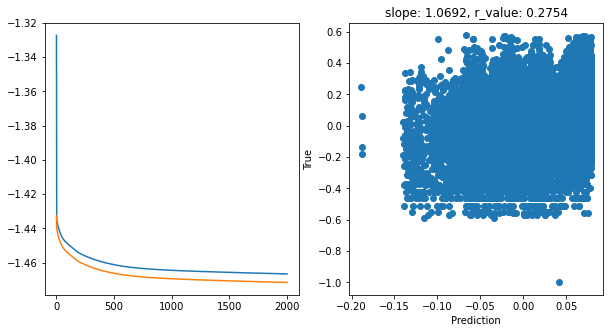

Saving model to  ./models/model_SGD_2000_lr0.05_hid_dim256

hid_dim: 256, lr: 0.001
Deleting previous model
Epoch 0, train_loss: 0.0390, val_loss: 0.0385, r_value: -0.0500
Epoch 100, train_loss: 0.0371, val_loss: 0.0367, r_value: -0.0354
Epoch 200, train_loss: 0.0370, val_loss: 0.0366, r_value: -0.0046
Epoch 300, train_loss: 0.0369, val_loss: 0.0365, r_value: 0.0342
Epoch 400, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0788
Epoch 500, train_loss: 0.0367, val_loss: 0.0363, r_value: 0.1250
Epoch 600, train_loss: 0.0367, val_loss: 0.0363, r_value: 0.1674
Epoch 700, train_loss: 0.0366, val_loss: 0.0362, r_value: 0.1996
Epoch 800, train_loss: 0.0366, val_loss: 0.0362, r_value: 0.2203
Epoch 900, train_loss: 0.0365, val_loss: 0.0361, r_value: 0.2322
Epoch 1000, train_loss: 0.0365, val_loss: 0.0361, r_value: 0.2390
Epoch 1100, train_loss: 0.0364, val_loss: 0.0360, r_value: 0.2429
Epoch 1200, train_loss: 0.0364, val_loss: 0.0360, r_value: 0.2454
Epoch 1300, train_loss: 0.0364, val_loss: 0

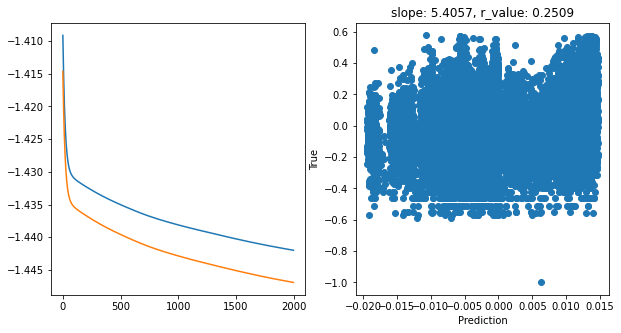

Saving model to  ./models/model_SGD_2000_lr0.001_hid_dim256

hid_dim: 512, lr: 0.75
Deleting previous model
Epoch 0, train_loss: 0.0609, val_loss: 1.0356, r_value: 0.0468
Epoch 100, train_loss: 0.0369, val_loss: 0.0361, r_value: 0.2352
Epoch 200, train_loss: 0.0371, val_loss: 0.0362, r_value: 0.2374
Epoch 300, train_loss: 0.0369, val_loss: 0.0361, r_value: 0.2557
Epoch 400, train_loss: 0.0369, val_loss: 0.0361, r_value: 0.2611
Epoch 500, train_loss: 0.0369, val_loss: 0.0361, r_value: 0.2630
Epoch 600, train_loss: 0.0369, val_loss: 0.0361, r_value: 0.2638
Epoch 700, train_loss: 0.0369, val_loss: 0.0361, r_value: 0.2645
Epoch 800, train_loss: 0.0369, val_loss: 0.0361, r_value: 0.2650
Epoch 900, train_loss: 0.0369, val_loss: 0.0361, r_value: 0.2653
Epoch 1000, train_loss: 0.0369, val_loss: 0.0362, r_value: 0.2656
Epoch 1100, train_loss: 0.0368, val_loss: 0.0361, r_value: 0.2651
Epoch 1200, train_loss: 0.0368, val_loss: 0.0361, r_value: 0.2659
Epoch 1300, train_loss: 0.0368, val_loss: 0.03

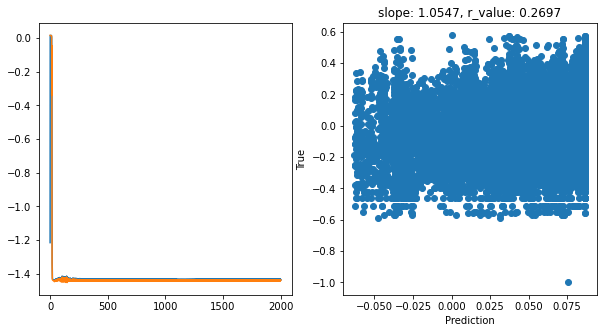

Saving model to  ./models/model_SGD_2000_lr0.75_hid_dim512

hid_dim: 512, lr: 0.5
Deleting previous model
Epoch 0, train_loss: 0.0367, val_loss: 0.0525, r_value: 0.1302
Epoch 100, train_loss: 0.0349, val_loss: 0.0348, r_value: 0.2531
Epoch 200, train_loss: 0.0348, val_loss: 0.0346, r_value: 0.2613
Epoch 300, train_loss: 0.0347, val_loss: 0.0344, r_value: 0.2671
Epoch 400, train_loss: 0.0346, val_loss: 0.0343, r_value: 0.2712
Epoch 500, train_loss: 0.0346, val_loss: 0.0343, r_value: 0.2743
Epoch 600, train_loss: 0.0346, val_loss: 0.0342, r_value: 0.2768
Epoch 700, train_loss: 0.0346, val_loss: 0.0343, r_value: 0.2791
Epoch 800, train_loss: 0.0346, val_loss: 0.0343, r_value: 0.2810
Epoch 900, train_loss: 0.0346, val_loss: 0.0343, r_value: 0.2830
Epoch 1000, train_loss: 0.0346, val_loss: 0.0343, r_value: 0.2849
Epoch 1100, train_loss: 0.0346, val_loss: 0.0343, r_value: 0.2865
Epoch 1200, train_loss: 0.0346, val_loss: 0.0343, r_value: 0.2881
Epoch 1300, train_loss: 0.0346, val_loss: 0.0343

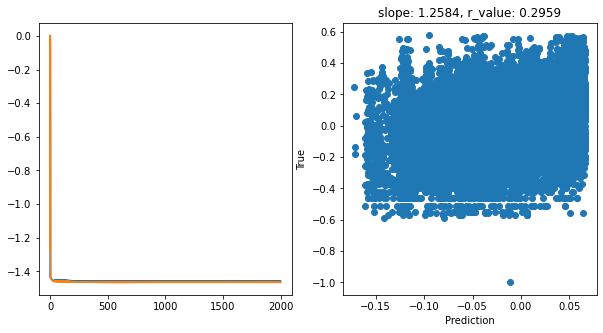

Saving model to  ./models/model_SGD_2000_lr0.5_hid_dim512

hid_dim: 512, lr: 0.1
Deleting previous model
Epoch 0, train_loss: 0.0655, val_loss: 0.2053, r_value: 0.0031
Epoch 100, train_loss: 0.0349, val_loss: 0.0345, r_value: 0.2646
Epoch 200, train_loss: 0.0345, val_loss: 0.0341, r_value: 0.2688
Epoch 300, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2714
Epoch 400, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2737
Epoch 500, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2758
Epoch 600, train_loss: 0.0341, val_loss: 0.0337, r_value: 0.2778
Epoch 700, train_loss: 0.0341, val_loss: 0.0337, r_value: 0.2798
Epoch 800, train_loss: 0.0341, val_loss: 0.0336, r_value: 0.2817
Epoch 900, train_loss: 0.0340, val_loss: 0.0336, r_value: 0.2836
Epoch 1000, train_loss: 0.0340, val_loss: 0.0336, r_value: 0.2855
Epoch 1100, train_loss: 0.0339, val_loss: 0.0335, r_value: 0.2875
Epoch 1200, train_loss: 0.0339, val_loss: 0.0335, r_value: 0.2894
Epoch 1300, train_loss: 0.0339, val_loss: 0.0335,

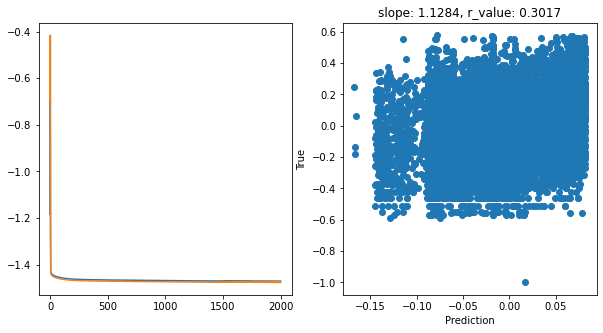

Saving model to  ./models/model_SGD_2000_lr0.1_hid_dim512

hid_dim: 512, lr: 0.01
Deleting previous model
Epoch 0, train_loss: 0.0416, val_loss: 0.0374, r_value: 0.1086
Epoch 100, train_loss: 0.0360, val_loss: 0.0356, r_value: 0.1938
Epoch 200, train_loss: 0.0357, val_loss: 0.0353, r_value: 0.2226
Epoch 300, train_loss: 0.0355, val_loss: 0.0351, r_value: 0.2361
Epoch 400, train_loss: 0.0354, val_loss: 0.0349, r_value: 0.2431
Epoch 500, train_loss: 0.0352, val_loss: 0.0348, r_value: 0.2478
Epoch 600, train_loss: 0.0351, val_loss: 0.0347, r_value: 0.2510
Epoch 700, train_loss: 0.0351, val_loss: 0.0346, r_value: 0.2529
Epoch 800, train_loss: 0.0350, val_loss: 0.0346, r_value: 0.2542
Epoch 900, train_loss: 0.0349, val_loss: 0.0345, r_value: 0.2552
Epoch 1000, train_loss: 0.0349, val_loss: 0.0345, r_value: 0.2564
Epoch 1100, train_loss: 0.0348, val_loss: 0.0344, r_value: 0.2571
Epoch 1200, train_loss: 0.0348, val_loss: 0.0344, r_value: 0.2576
Epoch 1300, train_loss: 0.0347, val_loss: 0.0343

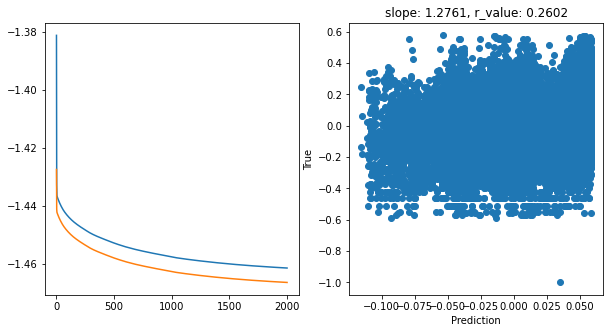

Saving model to  ./models/model_SGD_2000_lr0.01_hid_dim512

hid_dim: 512, lr: 0.05
Deleting previous model
Epoch 0, train_loss: 0.0798, val_loss: 0.1208, r_value: 0.0015
Epoch 100, train_loss: 0.0349, val_loss: 0.0345, r_value: 0.2671
Epoch 200, train_loss: 0.0345, val_loss: 0.0341, r_value: 0.2704
Epoch 300, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2713
Epoch 400, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2724
Epoch 500, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2736
Epoch 600, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2749
Epoch 700, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2763
Epoch 800, train_loss: 0.0341, val_loss: 0.0337, r_value: 0.2777
Epoch 900, train_loss: 0.0341, val_loss: 0.0337, r_value: 0.2788
Epoch 1000, train_loss: 0.0341, val_loss: 0.0337, r_value: 0.2799
Epoch 1100, train_loss: 0.0341, val_loss: 0.0337, r_value: 0.2809
Epoch 1200, train_loss: 0.0341, val_loss: 0.0337, r_value: 0.2819
Epoch 1300, train_loss: 0.0343, val_loss: 0.033

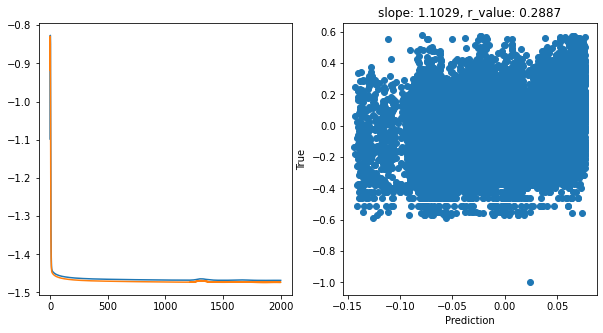

Saving model to  ./models/model_SGD_2000_lr0.05_hid_dim512

hid_dim: 512, lr: 0.001
Deleting previous model
Epoch 0, train_loss: 0.0546, val_loss: 0.0524, r_value: 0.0672
Epoch 100, train_loss: 0.0370, val_loss: 0.0365, r_value: 0.0705
Epoch 200, train_loss: 0.0368, val_loss: 0.0363, r_value: 0.0816
Epoch 300, train_loss: 0.0367, val_loss: 0.0362, r_value: 0.0942
Epoch 400, train_loss: 0.0366, val_loss: 0.0361, r_value: 0.1080
Epoch 500, train_loss: 0.0365, val_loss: 0.0360, r_value: 0.1223
Epoch 600, train_loss: 0.0364, val_loss: 0.0360, r_value: 0.1344
Epoch 700, train_loss: 0.0364, val_loss: 0.0359, r_value: 0.1454
Epoch 800, train_loss: 0.0363, val_loss: 0.0358, r_value: 0.1554
Epoch 900, train_loss: 0.0363, val_loss: 0.0358, r_value: 0.1645
Epoch 1000, train_loss: 0.0362, val_loss: 0.0358, r_value: 0.1728
Epoch 1100, train_loss: 0.0362, val_loss: 0.0357, r_value: 0.1804
Epoch 1200, train_loss: 0.0361, val_loss: 0.0357, r_value: 0.1873
Epoch 1300, train_loss: 0.0361, val_loss: 0.03

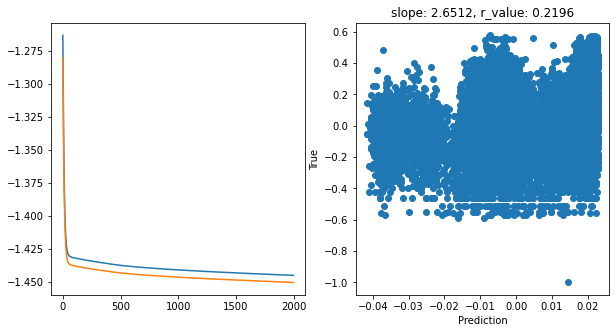

Saving model to  ./models/model_SGD_2000_lr0.001_hid_dim512


In [43]:
# model.train()
epochs = 2000
hid_dim_range = [128,256,512]
lr_range = [0.75,0.5,0.1,0.01,0.05,0.001]

#Let's create a place to save these models, so we can 
path_to_save_models = './models'
if not os.path.exists(path_to_save_models):
    os.makedirs(path_to_save_models)

for hid_dim in hid_dim_range:
    for lr in lr_range:
        print('\nhid_dim: {}, lr: {}'.format(hid_dim, lr))
        if 'model' in globals():
            print('Deleting previous model')
            del model, criterion, optimizer
        model = Feedforward(2, hid_dim)
        criterion = torch.nn.MSELoss()
        optimizer = torch.optim.SGD(model.parameters(), lr = lr)

        all_loss_train=[]
        all_loss_val=[]
        for epoch in range(epochs):
            model.train()
            optimizer.zero_grad()
            # Forward pass
            y_pred = model(X_train)
            # Compute Loss
            loss = criterion(y_pred.squeeze(), y_train)

            # Backward pass
            loss.backward()
            optimizer.step()

            all_loss_train.append(loss.item())

            model.eval()
            with torch.no_grad():
                y_pred = model(X_test)
                # Compute Loss
                loss = criterion(y_pred.squeeze(), y_test)
                all_loss_val.append(loss.item())
            
                if epoch%100==0:
                    y_pred = y_pred.detach().numpy().squeeze()
                    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_pred, y_test)
                    print('Epoch {}, train_loss: {:.4f}, val_loss: {:.4f}, r_value: {:.4f}'.format(epoch,all_loss_train[-1],all_loss_val[-1],r_value))
                
        fig,ax=plt.subplots(1,2,figsize=(10,5))
        ax[0].plot(np.log10(all_loss_train))
        ax[0].plot(np.log10(all_loss_val))

        ax[1].scatter(y_pred, y_test)
        ax[1].set_xlabel('Prediction')
        ax[1].set_ylabel('True')
        ax[1].set_title('slope: {:.4f}, r_value: {:.4f}'.format(slope, r_value))
        plt.show()
        
        name_to_save = os.path.join(path_to_save_models,'model_SGD_' + str(epochs) + '_lr' + str(lr) + '_hid_dim' + str(hid_dim))
        print('Saving model to ', name_to_save)
        model_state = {
                    'epoch': epoch + 1,
                    'state_dict': model.state_dict(),
                    'optimizer' : optimizer.state_dict(),
            }
        torch.save(model_state, name_to_save +'.pt')

In [12]:
# Try deeper FF
class Feedforward(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Feedforward, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.fc2 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.fc3 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.fc4 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc5 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        self.tanh = torch.nn.Tanh()
    def forward(self, x):
        hidden = self.relu(self.fc1(x))
        hidden = self.relu(self.fc2(hidden))
        hidden = self.relu(self.fc3(hidden))
        hidden = self.relu(self.fc4(hidden))
        output = self.tanh(self.fc5(hidden))

        return output


hid_dim: 128, lr: 0.5
Deleting previous model
Epoch 0, train_loss: 0.0444, val_loss: 0.3563, r_value: 0.0159
Epoch 100, train_loss: 0.0359, val_loss: 0.0354, r_value: 0.2177
Epoch 200, train_loss: 0.0354, val_loss: 0.0349, r_value: 0.2562
Epoch 300, train_loss: 0.0351, val_loss: 0.0346, r_value: 0.2636
Epoch 400, train_loss: 0.0348, val_loss: 0.0344, r_value: 0.2682
Epoch 500, train_loss: 0.0346, val_loss: 0.0342, r_value: 0.2721
Epoch 600, train_loss: 0.0345, val_loss: 0.0341, r_value: 0.2755
Epoch 700, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2780
Epoch 800, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2803
Epoch 900, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2824
Epoch 1000, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2842
Epoch 1100, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2861
Epoch 1200, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2881
Epoch 1300, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2900
Epoch 1400, train_loss: 0.0343, val_loss:

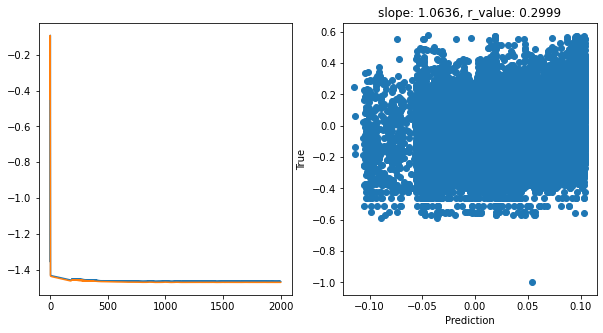

Saving model to  ./models/model_SGD_Deeper2000_lr0.5_hid_dim128

hid_dim: 128, lr: 0.1
Deleting previous model
Epoch 0, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.0682
Epoch 100, train_loss: 0.0358, val_loss: 0.0354, r_value: 0.2473
Epoch 200, train_loss: 0.0353, val_loss: 0.0349, r_value: 0.2601
Epoch 300, train_loss: 0.0350, val_loss: 0.0346, r_value: 0.2645
Epoch 400, train_loss: 0.0347, val_loss: 0.0343, r_value: 0.2660
Epoch 500, train_loss: 0.0346, val_loss: 0.0342, r_value: 0.2668
Epoch 600, train_loss: 0.0345, val_loss: 0.0341, r_value: 0.2673
Epoch 700, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2678
Epoch 800, train_loss: 0.0343, val_loss: 0.0340, r_value: 0.2683
Epoch 900, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2687
Epoch 1000, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2692
Epoch 1100, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2697
Epoch 1200, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2701
Epoch 1300, train_loss: 0.0342, val_loss: 0

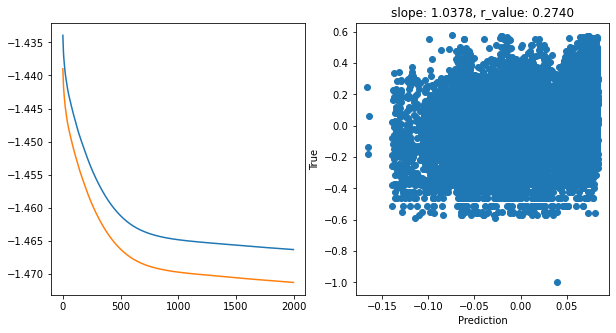

Saving model to  ./models/model_SGD_Deeper2000_lr0.1_hid_dim128

hid_dim: 128, lr: 0.01
Deleting previous model
Epoch 0, train_loss: 0.0409, val_loss: 0.0401, r_value: -0.0034
Epoch 100, train_loss: 0.0365, val_loss: 0.0362, r_value: 0.1120
Epoch 200, train_loss: 0.0362, val_loss: 0.0358, r_value: 0.2037
Epoch 300, train_loss: 0.0361, val_loss: 0.0357, r_value: 0.2251
Epoch 400, train_loss: 0.0360, val_loss: 0.0356, r_value: 0.2289
Epoch 500, train_loss: 0.0359, val_loss: 0.0355, r_value: 0.2303
Epoch 600, train_loss: 0.0358, val_loss: 0.0354, r_value: 0.2319
Epoch 700, train_loss: 0.0358, val_loss: 0.0353, r_value: 0.2334
Epoch 800, train_loss: 0.0357, val_loss: 0.0353, r_value: 0.2349
Epoch 900, train_loss: 0.0357, val_loss: 0.0352, r_value: 0.2365
Epoch 1000, train_loss: 0.0356, val_loss: 0.0352, r_value: 0.2380
Epoch 1100, train_loss: 0.0356, val_loss: 0.0352, r_value: 0.2395
Epoch 1200, train_loss: 0.0356, val_loss: 0.0351, r_value: 0.2410
Epoch 1300, train_loss: 0.0355, val_loss:

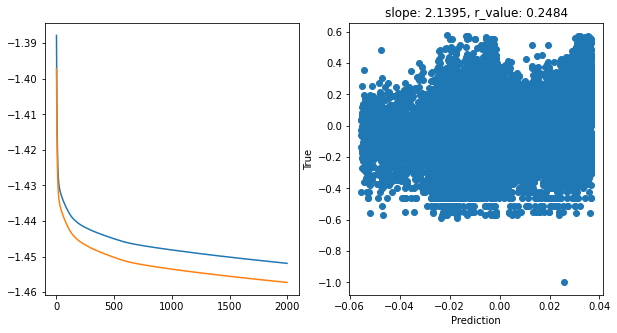

Saving model to  ./models/model_SGD_Deeper2000_lr0.01_hid_dim128

hid_dim: 128, lr: 0.05
Deleting previous model
Epoch 0, train_loss: 0.0433, val_loss: 0.0381, r_value: -0.0536
Epoch 100, train_loss: 0.0359, val_loss: 0.0355, r_value: 0.2417
Epoch 200, train_loss: 0.0355, val_loss: 0.0350, r_value: 0.2567
Epoch 300, train_loss: 0.0352, val_loss: 0.0347, r_value: 0.2637
Epoch 400, train_loss: 0.0349, val_loss: 0.0345, r_value: 0.2663
Epoch 500, train_loss: 0.0348, val_loss: 0.0343, r_value: 0.2685
Epoch 600, train_loss: 0.0346, val_loss: 0.0342, r_value: 0.2697
Epoch 700, train_loss: 0.0345, val_loss: 0.0341, r_value: 0.2705
Epoch 800, train_loss: 0.0345, val_loss: 0.0340, r_value: 0.2712
Epoch 900, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2718
Epoch 1000, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2723
Epoch 1100, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2728
Epoch 1200, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2733
Epoch 1300, train_loss: 0.0343, val_loss

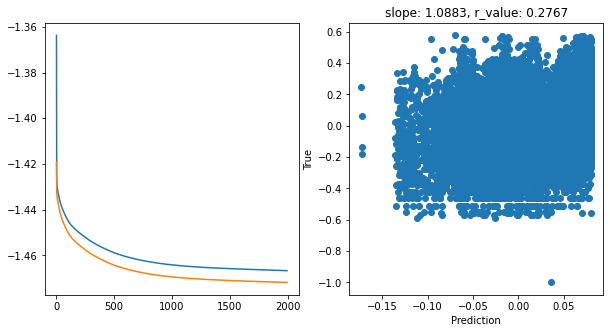

Saving model to  ./models/model_SGD_Deeper2000_lr0.05_hid_dim128

hid_dim: 256, lr: 0.5
Deleting previous model
Epoch 0, train_loss: 0.0371, val_loss: 0.1010, r_value: 0.0742
Epoch 100, train_loss: 0.0353, val_loss: 0.0350, r_value: 0.2469
Epoch 200, train_loss: 0.0349, val_loss: 0.0349, r_value: 0.2515
Epoch 300, train_loss: 0.0348, val_loss: 0.0346, r_value: 0.2602
Epoch 400, train_loss: 0.0347, val_loss: 0.0344, r_value: 0.2669
Epoch 500, train_loss: 0.0346, val_loss: 0.0343, r_value: 0.2718
Epoch 600, train_loss: 0.0345, val_loss: 0.0342, r_value: 0.2753
Epoch 700, train_loss: 0.0345, val_loss: 0.0342, r_value: 0.2781
Epoch 800, train_loss: 0.0345, val_loss: 0.0342, r_value: 0.2804
Epoch 900, train_loss: 0.0345, val_loss: 0.0342, r_value: 0.2824
Epoch 1000, train_loss: 0.0345, val_loss: 0.0342, r_value: 0.2843
Epoch 1100, train_loss: 0.0345, val_loss: 0.0342, r_value: 0.2862
Epoch 1200, train_loss: 0.0345, val_loss: 0.0342, r_value: 0.2880
Epoch 1300, train_loss: 0.0345, val_loss: 

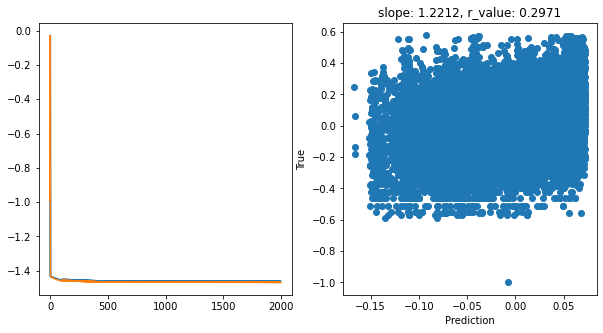

Saving model to  ./models/model_SGD_Deeper2000_lr0.5_hid_dim256

hid_dim: 256, lr: 0.1
Deleting previous model
Epoch 0, train_loss: 0.0419, val_loss: 0.0421, r_value: -0.0261
Epoch 100, train_loss: 0.0351, val_loss: 0.0347, r_value: 0.2541
Epoch 200, train_loss: 0.0347, val_loss: 0.0343, r_value: 0.2604
Epoch 300, train_loss: 0.0350, val_loss: 0.0346, r_value: 0.2628
Epoch 400, train_loss: 0.0345, val_loss: 0.0341, r_value: 0.2660
Epoch 500, train_loss: 0.0346, val_loss: 0.0343, r_value: 0.2680
Epoch 600, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2702
Epoch 700, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2720
Epoch 800, train_loss: 0.0343, val_loss: 0.0340, r_value: 0.2738
Epoch 900, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2753
Epoch 1000, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2768
Epoch 1100, train_loss: 0.0342, val_loss: 0.0339, r_value: 0.2783
Epoch 1200, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2798
Epoch 1300, train_loss: 0.0342, val_loss: 

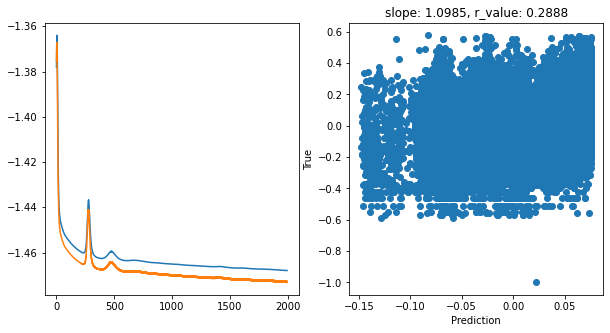

Saving model to  ./models/model_SGD_Deeper2000_lr0.1_hid_dim256

hid_dim: 256, lr: 0.01
Deleting previous model
Epoch 0, train_loss: 0.0464, val_loss: 0.0422, r_value: 0.0290
Epoch 100, train_loss: 0.0365, val_loss: 0.0361, r_value: 0.1089
Epoch 200, train_loss: 0.0361, val_loss: 0.0357, r_value: 0.1829
Epoch 300, train_loss: 0.0359, val_loss: 0.0354, r_value: 0.2206
Epoch 400, train_loss: 0.0357, val_loss: 0.0353, r_value: 0.2356
Epoch 500, train_loss: 0.0356, val_loss: 0.0352, r_value: 0.2424
Epoch 600, train_loss: 0.0355, val_loss: 0.0351, r_value: 0.2467
Epoch 700, train_loss: 0.0354, val_loss: 0.0349, r_value: 0.2501
Epoch 800, train_loss: 0.0352, val_loss: 0.0348, r_value: 0.2538
Epoch 900, train_loss: 0.0352, val_loss: 0.0348, r_value: 0.2555
Epoch 1000, train_loss: 0.0351, val_loss: 0.0347, r_value: 0.2572
Epoch 1100, train_loss: 0.0350, val_loss: 0.0346, r_value: 0.2583
Epoch 1200, train_loss: 0.0350, val_loss: 0.0346, r_value: 0.2593
Epoch 1300, train_loss: 0.0349, val_loss: 

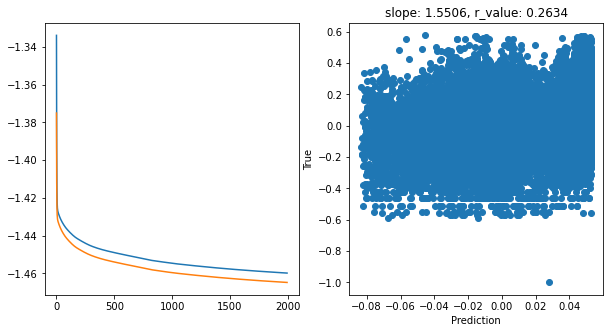

Saving model to  ./models/model_SGD_Deeper2000_lr0.01_hid_dim256

hid_dim: 256, lr: 0.05
Deleting previous model
Epoch 0, train_loss: 0.0376, val_loss: 0.0372, r_value: -0.0483
Epoch 100, train_loss: 0.0356, val_loss: 0.0351, r_value: 0.2509
Epoch 200, train_loss: 0.0352, val_loss: 0.0347, r_value: 0.2564
Epoch 300, train_loss: 0.0349, val_loss: 0.0345, r_value: 0.2608
Epoch 400, train_loss: 0.0347, val_loss: 0.0343, r_value: 0.2631
Epoch 500, train_loss: 0.0346, val_loss: 0.0342, r_value: 0.2643
Epoch 600, train_loss: 0.0345, val_loss: 0.0341, r_value: 0.2654
Epoch 700, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2664
Epoch 800, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2675
Epoch 900, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2684
Epoch 1000, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2693
Epoch 1100, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2702
Epoch 1200, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2712
Epoch 1300, train_loss: 0.0343, val_loss

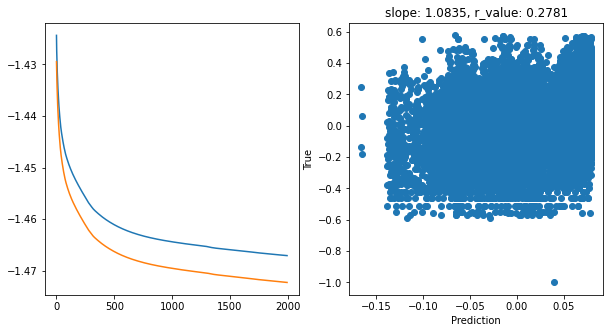

Saving model to  ./models/model_SGD_Deeper2000_lr0.05_hid_dim256

hid_dim: 512, lr: 0.5
Deleting previous model
Epoch 0, train_loss: 0.0455, val_loss: 0.9616, r_value: 0.0177
Epoch 100, train_loss: 0.0358, val_loss: 0.0350, r_value: 0.2580
Epoch 200, train_loss: 0.0354, val_loss: 0.0346, r_value: 0.2687
Epoch 300, train_loss: 0.0351, val_loss: 0.0345, r_value: 0.2715
Epoch 400, train_loss: 0.0349, val_loss: 0.0344, r_value: 0.2737
Epoch 500, train_loss: 0.0348, val_loss: 0.0343, r_value: 0.2757
Epoch 600, train_loss: 0.0347, val_loss: 0.0342, r_value: 0.2773
Epoch 700, train_loss: 0.0346, val_loss: 0.0342, r_value: 0.2791
Epoch 800, train_loss: 0.0346, val_loss: 0.0341, r_value: 0.2808
Epoch 900, train_loss: 0.0346, val_loss: 0.0341, r_value: 0.2826
Epoch 1000, train_loss: 0.0346, val_loss: 0.0341, r_value: 0.2844
Epoch 1100, train_loss: 0.0347, val_loss: 0.0342, r_value: 0.2863
Epoch 1200, train_loss: 0.0347, val_loss: 0.0342, r_value: 0.2880
Epoch 1300, train_loss: 0.0347, val_loss: 

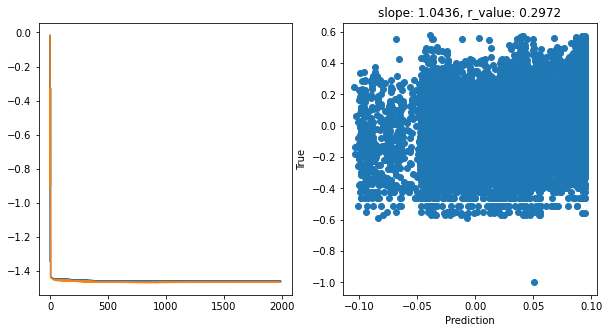

Saving model to  ./models/model_SGD_Deeper2000_lr0.5_hid_dim512

hid_dim: 512, lr: 0.1
Deleting previous model
Epoch 0, train_loss: 0.0500, val_loss: 0.2197, r_value: -0.0103
Epoch 100, train_loss: 0.0349, val_loss: 0.0345, r_value: 0.2646
Epoch 200, train_loss: 0.0345, val_loss: 0.0341, r_value: 0.2687
Epoch 300, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2705
Epoch 400, train_loss: 0.0346, val_loss: 0.0342, r_value: 0.2716
Epoch 500, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2746
Epoch 600, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2765
Epoch 700, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2784
Epoch 800, train_loss: 0.0342, val_loss: 0.0337, r_value: 0.2804
Epoch 900, train_loss: 0.0341, val_loss: 0.0337, r_value: 0.2823
Epoch 1000, train_loss: 0.0341, val_loss: 0.0337, r_value: 0.2843
Epoch 1100, train_loss: 0.0341, val_loss: 0.0336, r_value: 0.2862
Epoch 1200, train_loss: 0.0340, val_loss: 0.0336, r_value: 0.2880
Epoch 1300, train_loss: 0.0340, val_loss: 

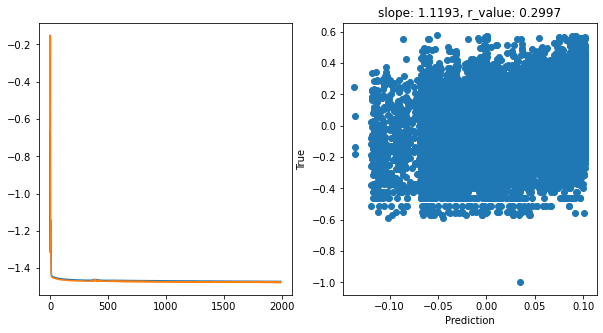

Saving model to  ./models/model_SGD_Deeper2000_lr0.1_hid_dim512

hid_dim: 512, lr: 0.01
Deleting previous model
Epoch 0, train_loss: 0.0538, val_loss: 0.0410, r_value: 0.0131
Epoch 100, train_loss: 0.0360, val_loss: 0.0356, r_value: 0.2017
Epoch 200, train_loss: 0.0356, val_loss: 0.0352, r_value: 0.2396
Epoch 300, train_loss: 0.0354, val_loss: 0.0350, r_value: 0.2488
Epoch 400, train_loss: 0.0352, val_loss: 0.0348, r_value: 0.2538
Epoch 500, train_loss: 0.0351, val_loss: 0.0347, r_value: 0.2556
Epoch 600, train_loss: 0.0350, val_loss: 0.0346, r_value: 0.2569
Epoch 700, train_loss: 0.0349, val_loss: 0.0345, r_value: 0.2587
Epoch 800, train_loss: 0.0348, val_loss: 0.0344, r_value: 0.2603
Epoch 900, train_loss: 0.0347, val_loss: 0.0343, r_value: 0.2613
Epoch 1000, train_loss: 0.0347, val_loss: 0.0343, r_value: 0.2621
Epoch 1100, train_loss: 0.0346, val_loss: 0.0342, r_value: 0.2629
Epoch 1200, train_loss: 0.0346, val_loss: 0.0342, r_value: 0.2635
Epoch 1300, train_loss: 0.0346, val_loss: 

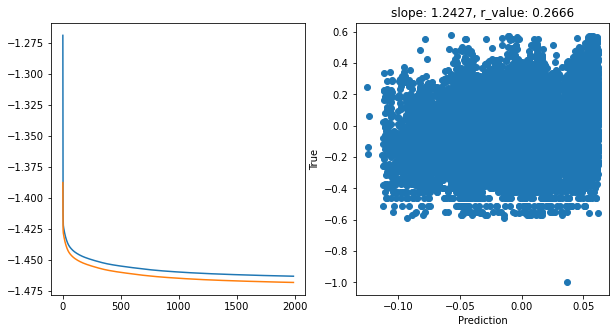

Saving model to  ./models/model_SGD_Deeper2000_lr0.01_hid_dim512

hid_dim: 512, lr: 0.05
Deleting previous model
Epoch 0, train_loss: 0.0401, val_loss: 0.0391, r_value: 0.1707
Epoch 100, train_loss: 0.0351, val_loss: 0.0346, r_value: 0.2596
Epoch 200, train_loss: 0.0347, val_loss: 0.0343, r_value: 0.2640
Epoch 300, train_loss: 0.0346, val_loss: 0.0341, r_value: 0.2655
Epoch 400, train_loss: 0.0345, val_loss: 0.0340, r_value: 0.2667
Epoch 500, train_loss: 0.0353, val_loss: 0.0349, r_value: 0.2670
Epoch 600, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2693
Epoch 700, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2705
Epoch 800, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2716
Epoch 900, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.2726
Epoch 1000, train_loss: 0.0343, val_loss: 0.0339, r_value: 0.2737
Epoch 1100, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2748
Epoch 1200, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.2763
Epoch 1300, train_loss: 0.0342, val_loss:

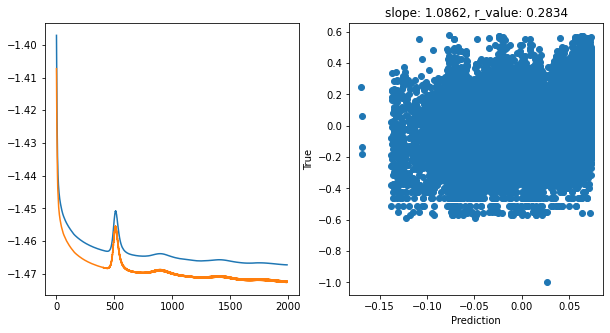

Saving model to  ./models/model_SGD_Deeper2000_lr0.05_hid_dim512


In [44]:
# model.train()
epoch = 2000
hid_dim_range = [128,256,512]
lr_range = [0.5,0.1,0.01,0.05]

for hid_dim in hid_dim_range:
    for lr in lr_range:
        print('\nhid_dim: {}, lr: {}'.format(hid_dim, lr))
        if 'model' in globals():
            print('Deleting previous model')
            del model, criterion, optimizer
        model = Feedforward(2, hid_dim)
        criterion = torch.nn.MSELoss()
        optimizer = torch.optim.SGD(model.parameters(), lr = lr)

        all_loss_train=[]
        all_loss_val=[]
        for epoch in range(epoch):
            model.train()
            optimizer.zero_grad()
            # Forward pass
            y_pred = model(X_train)
            # Compute Loss
            loss = criterion(y_pred.squeeze(), y_train)

            # Backward pass
            loss.backward()
            optimizer.step()

            all_loss_train.append(loss.item())

            model.eval()
            with torch.no_grad():
                y_pred = model(X_test)
                # Compute Loss
                loss = criterion(y_pred.squeeze(), y_test)
                all_loss_val.append(loss.item())
            
                if epoch%100==0:
                    y_pred = y_pred.detach().numpy().squeeze()
                    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_pred, y_test)
                    print('Epoch {}, train_loss: {:.4f}, val_loss: {:.4f}, r_value: {:.4f}'.format(epoch,all_loss_train[-1],all_loss_val[-1],r_value))
                
        fig,ax=plt.subplots(1,2,figsize=(10,5))
        ax[0].plot(np.log10(all_loss_train))
        ax[0].plot(np.log10(all_loss_val))

        ax[1].scatter(y_pred, y_test)
        ax[1].set_xlabel('Prediction')
        ax[1].set_ylabel('True')
        ax[1].set_title('slope: {:.4f}, r_value: {:.4f}'.format(slope, r_value))
        plt.show()
        
        name_to_save = os.path.join(path_to_save_models,'model_SGD_Deeper' + str(epochs) + '_lr' + str(lr) + '_hid_dim' + str(hid_dim))
        print('Saving model to ', name_to_save)
        model_state = {
                    'epoch': epoch + 1,
                    'state_dict': model.state_dict(),
                    'optimizer' : optimizer.state_dict(),
            }
        torch.save(model_state, name_to_save +'.pt')